# Signal-to-noise ratio

**in-vivo**:

* `Horvath`
    * rat
    * rectangular contact of 20 um side, see (2,3)
    * 128ch 
    * 20.0kHz
    * 3688.668s (1h)
    * "Spontaneous activity" (Only anesthetized condition)
    * questions: do we metadata for Horvath? were some of the contacts discarded?
    
**in-silico**:

* `Horvath`
    * rectangular contact of 20 um side, see (2,3)
    * 128ch 
    * 20.0kHz
    * 10 min
    * "Spontaneous activity"


### Setup libs

Activate `npx_10m_384ch_unit_classes` venv

In [1]:
# import libs
%load_ext autoreload
%autoreload 2

import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import scipy
import spikeinterface.extractors as se 
import os
import spikeinterface as si
import spikeinterface.preprocessing as spre
import shutil 

# move to PROJECT PATH
PROJ_PATH = "/gpfs/bbp.cscs.ch/project/proj68/home/laquitai/preprint_2023/"
os.chdir(PROJ_PATH)

from src.nodes.utils import get_config
from src.nodes.study import amplitude
from src.nodes.prepro import preprocess
from src.nodes.dataeng.silico import recording


# SETUP PARAMETERS
GAIN = 1e5
# NOISE_STD = 3000


# horvath (vivo)
EXPERIMENT_h_vivo = "vivo_horvath"
SIMULATION_h_vivo = "probe_1" # TODO: change to probe_1
data_conf_h_vivo, param_conf_h_vivo = get_config(
    EXPERIMENT_h_vivo, SIMULATION_h_vivo
).values() 
RAW_PATH_h_vivo = data_conf_h_vivo["raw"]
PREP_PATH_h_vivo = data_conf_h_vivo["preprocessing"]["output"]["trace_file_path"]
SNR_PATH_h_vivo = data_conf_h_vivo["postprocessing"]["trace_snr"]
CONTACTS_h = np.arange(0,128,1)

# HORVATH (silico)
EXPERIMENT_h_silico = "silico_horvath"
SIMULATION_h_silico = "concatenated/probe_1"
data_conf_h_silico, param_conf_h_silico = get_config(
    EXPERIMENT_h_silico, SIMULATION_h_silico
).values()
RAW_PATH_h_silico = data_conf_h_silico["recording"]["output"]
PREP_PATH_h_silico = data_conf_h_silico["preprocessing"]["output"]["trace_file_path"]
SNR_PATH_h_silico = data_conf_h_silico["postprocessing"]["trace_snr"]

2023-11-24 21:26:20,563 - root - utils.py - get_config - INFO - Reading experiment config.
2023-11-24 21:26:20,572 - root - utils.py - get_config - INFO - Reading experiment config. - done
2023-11-24 21:26:20,574 - root - utils.py - get_config - INFO - Reading experiment config.
2023-11-24 21:26:20,584 - root - utils.py - get_config - INFO - Reading experiment config. - done


### Setup datasets

Reyes is on hold. The traces currently contain whisker stimulation periods, not spontaneous only. Waiting for Milo's help to interpret the metadata.

### Compute

### Add background noise

“sources of electrical activity that might contribute to the noise power spec- trum, like electronic noise, axons, dendrites or synapse currents (Llinas, 1988; Farrant et al., 1994), was simulated by adding Gaus- sian noise” (Martinez et al., 2009, p. 287)

In [30]:
# takes 1 secs

# silico
RawRecording_h_silico = si.load_extractor(RAW_PATH_h_silico)
PreRecording_h_silico = si.load_extractor(PREP_PATH_h_silico)

# vivo
RawRecording_h_vivo = se.NwbRecordingExtractor(RAW_PATH_h_vivo)
PreRecording_h_vivo = si.load_extractor(PREP_PATH_h_vivo)

# takes 6 min
# horvath (silico)
# raw_silico_horvath_with_noise = recording.run(
#     data_conf_horvath_silico, gain=GAIN, offset=True, noise_std=NOISE_STD
# )
# recording.write(raw_silico_horvath_with_noise, data_conf_horvath_silico)

#### Process traces

- A lfp trace of 87,710,000 timepoints takes 2 min to plot.
- We normalize the traces between 0 and 1 to get rid of the different voltage amplification used. This allows a fair comparison between trace amplitude distribution. This relies on the assumptions that
    - the electrodes' contacts have different radii (10/20 um for reyes/horvath) but that the effect on the measured voltage amplitude is small (about 0.2 mv, see Hagen, Fig 4b, JNMethods, 2015)
        - all trace will have the same minimum absolute voltage of 0. Our normalization allow to compare how fast amplitude distributions fall from their common peak at 0, which analysis relies on no assumption.
    -  all traces, if long enough, converge to the same single-unit maximum amplitude (because isolatable single-units are within the same distance to the electrode).

    

In [5]:
## re-preprocess traces and save (takes 1 hour)
# horvath_recording_pre = amplitude.preprocess_horvath(DATA_PATH_horvath, PREPRO_PATH_horvath, freq_min=300, freq_max=4999)

# takes 5 min
# recording_pre_silico_horvath = amplitude.preprocess_silico(
#     RAW_RECORDING_PATH_SILICO_HORVATH,
#     PREPRO_PATH_SILICO_HORVATH,
#     freq_min=300,
#     freq_max=4999,
# )
# recording_pre_384 = amplitude.preprocess_silico(RAW_RECORDING_PATH_384, PREPRO_PATH_384, freq_min=300, freq_max=4999)
# recording_pre_bucci = amplitude.preprocess_silico(RAW_RECORDING_PATH_bucci, PREPRO_PATH_bucci, freq_min=300, freq_max=4999)
# recording_pre_32 = amplitude.preprocess_silico(RAW_RECORDING_PATH_32, PREPRO_PATH_32, freq_min=300, freq_max=4999)

is filtered: True
write_binary_recording with n_jobs = 1 and chunk_size = None


In [6]:
# # takes 1 sec

# ## load and normalize to max to 1 (for fair comparison with other traces)
# reyes_recording_pre = si.load_extractor(PREPRO_PATH_REYES)
# horvath_recording_pre = si.load_extractor(PREPRO_PATH_horvath)
# silico_horvath_recording_pre = si.load_extractor(PREPRO_PATH_SILICO_HORVATH)
# recording_pre_384 = si.load_extractor(PREPRO_PATH_384)
# recording_pre_bucci = si.load_extractor(PREPRO_PATH_bucci)
# recording_pre_32 = si.load_extractor(PREPRO_PATH_32)

### Signal-to-noise ratio (SNR)

* Large outlier amplitudes will have substantial impact on lower normalized amplitudes with the above normalization approach. To make our amplitude robust to outliers, so we calculated an amplitude-to-noise ratio by normalizing the amplitudes by the mean absolute deviation of the traces.
* we plot on logscale because the amplitude probability dist. decays exponentially, which is not visible on a linear scale.
* we plot the top ci only (because bottom ci go to infinity (when negative) on a logscale)

In [31]:
def write_npy(anr, file_write_path: str):
    parent_path = os.path.dirname(file_write_path)
    if not os.path.isdir(parent_path):
        os.makedirs(parent_path)
    np.save(file_write_path, anr, allow_pickle=True)

In [32]:
# takes 20 mins

# # reyes
# anr_reyes = amplitude.compute_anr(reyes_recording_pre, CONTACTS_IN_CIRCUIT_reyes)

# horvath (vivo vs silico)
anr_h_vivo = amplitude.compute_anr(PreRecording_h_vivo, CONTACTS_h)
anr_h_silico = amplitude.compute_anr(PreRecording_h_silico, CONTACTS_h)

# # npx384
# anr_384 = amplitude.compute_anr(recording_pre_384, CONTACTS_IN_CIRCUIT_npx384)

# # npx32 (silico, 9 secs)
# anr_32 = amplitude.compute_anr(recording_pre_32, CONTACTS_IN_CIRCUIT_npx32)

# # buccino
# anr_bucci = amplitude.compute_anr(recording_pre_bucci, CONTACTS_IN_CIRCUIT_bucci)

# # SAVE: takes 1 min

# parent_path = os.path.dirname(AMPLITUDE_TO_NOISE_PATH_REYES)
# if not os.path.isdir(parent_path):
#     os.makedirs(parent_path)
# np.save(AMPLITUDE_TO_NOISE_PATH_REYES, anr_reyes, allow_pickle=True)

write_npy(anr_h_vivo, SNR_PATH_h_vivo)
write_npy(anr_h_silico, SNR_PATH_h_silico)

# parent_path = os.path.dirname(AMPLITUDE_TO_NOISE_PATH_384)
# if not os.path.isdir(parent_path):
#     os.makedirs(parent_path)
# np.save(AMPLITUDE_TO_NOISE_PATH_384, anr_384, allow_pickle=True)

# parent_path = os.path.dirname(AMPLITUDE_TO_NOISE_PATH_32)
# if not os.path.isdir(parent_path):
#     os.makedirs(parent_path)
# np.save(AMPLITUDE_TO_NOISE_PATH_32, anr_32, allow_pickle=True)

# parent_path = os.path.dirname(AMPLITUDE_TO_NOISE_PATH_BUCCI)
# if not os.path.isdir(parent_path):
#     os.makedirs(parent_path)
# np.save(AMPLITUDE_TO_NOISE_PATH_BUCCI, anr_bucci, allow_pickle=True)

/gpfs/bbp.cscs.ch/project/proj68/home/laquitai/sfn_2023/src/nodes/study/amplitude.py:172: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  mad = pd.DataFrame(trace_i).mad().values


In [8]:
# takes 8 min

# load
# anr_reyes = np.load(AMPLITUDE_TO_NOISE_PATH_REYES)
anr_h_vivo = np.load(SNR_PATH_h_vivo)
anr_h_silico = np.load(SNR_PATH_h_vivo)
# anr_384 = np.load(AMPLITUDE_TO_NOISE_PATH_384)
# anr_32 = np.load(AMPLITUDE_TO_NOISE_PATH_32)
# anr_bucci = np.load(AMPLITUDE_TO_NOISE_PATH_BUCCI)

# calculate common bin across dataset (takes 4 mins)
N_BINS = 30

anr_all = np.hstack(
    [
        # np.array(anr_reyes).flatten(),
        # np.array(anr_32).flatten(),
        # np.array(anr_384).flatten(),
        np.array(anr_h_vivo).flatten(),
        np.array(anr_h_silico).flatten(),
        # np.array(anr_bucci).flatten(),
    ]
)
anr_max = np.max(anr_all)
anr_min = np.min(anr_all)
step = (anr_max - anr_min) / N_BINS
bins = np.arange(anr_min, anr_max + step / 2, step)

# Compute the mean and CI of probability distributions over contacts (takes 4 min)

# reyes
dist_mean_reyes, dist_ci_reyes = amplitude.compute_anr_proba_dist_stats(anr_reyes, bins)

# horvath (vivo)
dist_mean_horvath, dist_ci_horvath = amplitude.compute_anr_proba_dist_stats(
    anr_h_vivo, bins
)

# horvath (silico)
(
    dist_mean_silico_horvath,
    dist_ci_silico_horvath,
) = amplitude.compute_anr_proba_dist_stats(anr_h_silico, bins)

# # npx384
# dist_mean_384, dist_ci_384 = amplitude.compute_anr_proba_dist_stats(anr_384, bins)

# # npx32
# dist_mean_32, dist_ci_32 = amplitude.compute_anr_proba_dist_stats(anr_32, bins)

# # buccino
# dist_mean_bucci, dist_ci_bucci = amplitude.compute_anr_proba_dist_stats(anr_bucci, bins)

In [9]:
# unit-test
assert 1 - sum(dist_mean_horvath) < 1e-15, "a proba dist. should sum to 1"
assert 1 - sum(dist_mean_silico_horvath) < 1e-15, "a proba dist. should sum to 1"
# assert 1 - sum(dist_mean_32) < 1e-15, "a proba dist. should sum to 1"
# assert 1 - sum(dist_mean_bucci) < 1e-15, "a proba dist. should sum to 1"
# assert 1 - sum(dist_mean_384) < 1e-15, "a proba dist. should sum to 1"

### Plot

#### horvath

* The dots below the x-axis line goes to -inf on a log scale because they are never observed (probability = 0)


/tmp/ipykernel_302996/645765072.py:30: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  axis.set_ylim([-1, 1.5])


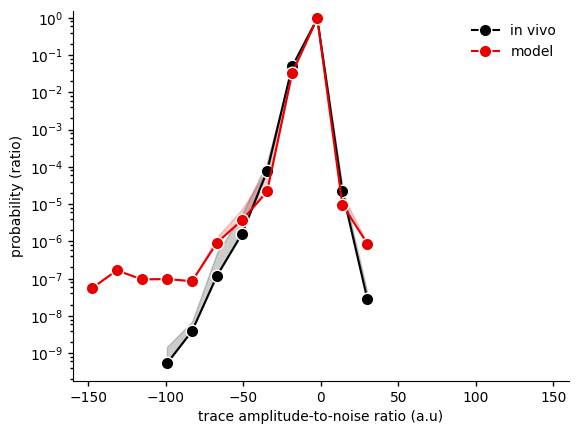

In [26]:
# plot
fig_, axis = plt.subplots(1, 1)

# horvath
amplitude.plot_proba_dist_stats(
    axis,
    dist_mean_horvath[dist_mean_horvath > 0],
    dist_ci_horvath[dist_mean_horvath > 0],
    bins[:-1][dist_mean_horvath > 0],
    color=[0, 0, 0],
    ci_color=[0, 0, 0],
    label="in vivo",
    linestyle="-",
)

# horvath (silico)
amplitude.plot_proba_dist_stats(
    axis,
    dist_mean_silico_horvath[dist_mean_silico_horvath > 0],
    dist_ci_horvath[dist_mean_silico_horvath > 0],
    bins[:-1][dist_mean_silico_horvath > 0],
    color=[0.9, 0, 0],
    ci_color=[0.9, 0, 0],
    label="model",
    linestyle="-",
)

# legend
axis.set_yscale("log")
axis.set_ylim([-1, 1.5])
axis.set_xlim([-160, 160])
axis.legend(frameon=False)
axis.spines[["right", "top"]].set_visible(False)
axis.set_ylabel("probability (ratio)")
axis.set_xlabel("trace amplitude-to-noise ratio (a.u)")
axis.tick_params(which="both", width=1)

# show minor ticks
axis.tick_params(which="major", width=1)
# y
locmaj = matplotlib.ticker.LogLocator(base=10, numticks=12)
locmin = matplotlib.ticker.LogLocator(base=10.0, subs=(0.2, 0.4, 0.6, 0.8), numticks=12)
axis.yaxis.set_major_locator(locmaj)
axis.yaxis.set_minor_locator(locmin)
axis.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

# save
plt.savefig("figures/2_realism/2_amplitude/horvath_amplitude_to_noise.pdf")
plt.savefig("figures/2_realism/2_amplitude/horvath_amplitude_to_noise.svg")

#### Neuropixels

/tmp/ipykernel_302996/3262097977.py:55: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  axis.set_ylim([-1, 1.5])


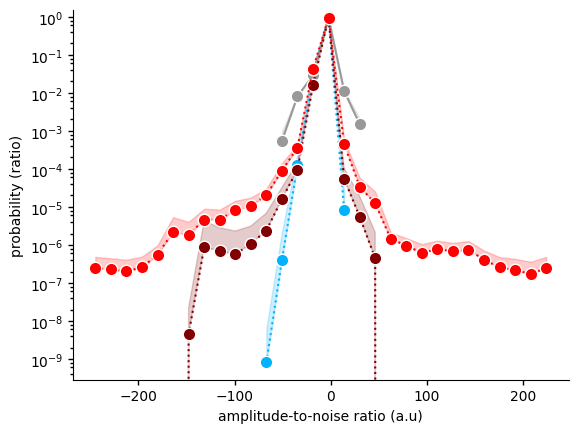

In [28]:
# # plot
# fig_, axis = plt.subplots(1, 1)

# # buccino
# amplitude.plot_proba_dist_stats(
#     axis,
#     dist_mean_bucci[dist_mean_bucci > 0],
#     dist_ci_bucci[dist_mean_bucci > 0],
#     bins[:-1][dist_mean_bucci > 0],
#     color=[0, 0.7, 1],
#     ci_color=[0, 0.7, 1],
#     label="buccino",
#     linestyle=":",
# )

# # npx384
# amplitude.plot_proba_dist_stats(
#     axis,
#     dist_mean_384,
#     dist_ci_384,
#     bins[:-1],
#     color=[0.5, 0, 0],
#     ci_color=[0.5, 0, 0],
#     label="npx384",
#     linestyle=":",
# )

# # npx32
# amplitude.plot_proba_dist_stats(
#     axis,
#     dist_mean_32,
#     dist_ci_32,
#     bins[:-1],
#     color=[1, 0, 0],
#     ci_color=[1, 0, 0],
#     label="npx32",
#     linestyle=":",
# )

# # legend
# axis.set_yscale("log")
# axis.set_ylim([-1, 1.5])
# # axis.legend(frameon=False);
# axis.spines[["right", "top"]].set_visible(False)
# axis.set_ylabel("probability (ratio)")
# axis.set_xlabel("amplitude-to-noise ratio (a.u)")
# axis.tick_params(which="both", width=1)

# # show minor ticks
# axis.tick_params(which="major", width=1)
# # y
# locmaj = matplotlib.ticker.LogLocator(base=10, numticks=12)
# locmin = matplotlib.ticker.LogLocator(base=10.0, subs=(0.2, 0.4, 0.6, 0.8), numticks=12)
# axis.yaxis.set_major_locator(locmaj)
# axis.yaxis.set_minor_locator(locmin)
# axis.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

# # save
# # plt.savefig("figures/2_realism/2_amplitude/amplitude_to_noise.pdf")
# # plt.savefig("figures/2_realism/2_amplitude/amplitude_to_noise.svg")

#### Reyes

/tmp/ipykernel_302996/3995013088.py:18: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  axis.set_ylim([-1, 1.5])


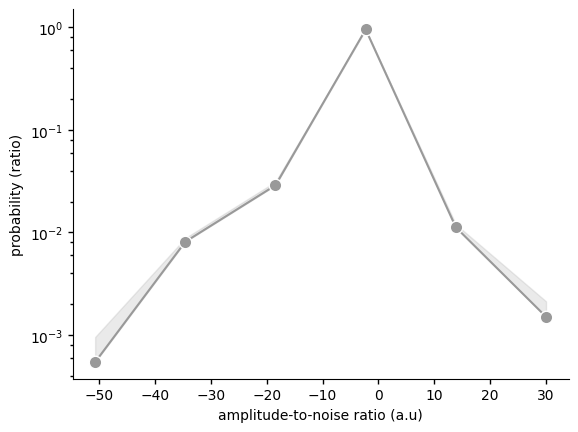

In [29]:
# # plot
# fig_, axis = plt.subplots(1, 1)

# # reyes
# amplitude.plot_proba_dist_stats(
#     axis,
#     dist_mean_reyes[dist_mean_reyes > 0],
#     dist_ci_reyes[dist_mean_reyes > 0],
#     bins[:-1][dist_mean_reyes > 0],
#     color=[0.6, 0.6, 0.6],
#     ci_color=[0.6, 0.6, 0.6],
#     label="Reyes",
#     linestyle="-",
# )

# # legend
# axis.set_yscale("log")
# axis.set_ylim([-1, 1.5])
# # axis.legend(frameon=False);
# axis.spines[["right", "top"]].set_visible(False)
# axis.set_ylabel("probability (ratio)")
# axis.set_xlabel("amplitude-to-noise ratio (a.u)")
# axis.tick_params(which="both", width=1)

# # show minor ticks
# axis.tick_params(which="major", width=1)
# # y
# locmaj = matplotlib.ticker.LogLocator(base=10, numticks=12)
# locmin = matplotlib.ticker.LogLocator(base=10.0, subs=(0.2, 0.4, 0.6, 0.8), numticks=12)
# axis.yaxis.set_major_locator(locmaj)
# axis.yaxis.set_minor_locator(locmin)
# axis.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

#### All

/tmp/ipykernel_87068/3318962747.py:78: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  axis.set_ylim([-1, 1])


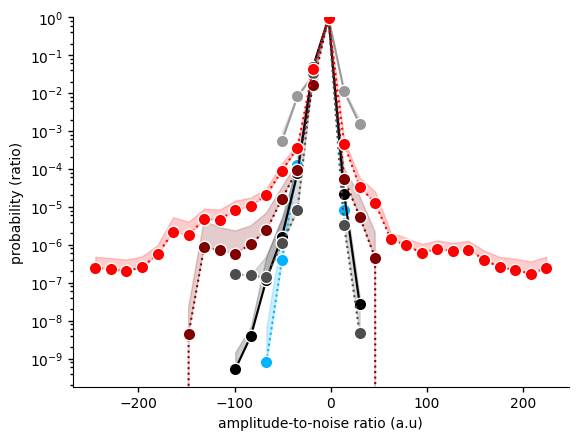

In [ ]:
# # plot
# fig_, axis = plt.subplots(1, 1)

# # buccino
# amplitude.plot_proba_dist_stats(
#     axis,
#     dist_mean_bucci[dist_mean_bucci > 0],
#     dist_ci_bucci[dist_mean_bucci > 0],
#     bins[:-1][dist_mean_bucci > 0],
#     color=[0, 0.7, 1],
#     ci_color=[0, 0.7, 1],
#     label="buccino",
#     linestyle=":",
# )

# # reyes
# amplitude.plot_proba_dist_stats(
#     axis,
#     dist_mean_reyes[dist_mean_reyes > 0],
#     dist_ci_reyes[dist_mean_reyes > 0],
#     bins[:-1][dist_mean_reyes > 0],
#     color=[0.6, 0.6, 0.6],
#     ci_color=[0.6, 0.6, 0.6],
#     label="Reyes",
#     linestyle="-",
# )

# # horvath
# amplitude.plot_proba_dist_stats(
#     axis,
#     dist_mean_horvath[dist_mean_horvath > 0],
#     dist_ci_horvath[dist_mean_horvath > 0],
#     bins[:-1][dist_mean_horvath > 0],
#     color=[0, 0, 0],
#     ci_color=[0, 0, 0],
#     label="Horvath (horvath)",
#     linestyle="-",
# )

# # horvath (silico)
# amplitude.plot_proba_dist_stats(
#     axis,
#     dist_mean_silico_horvath[dist_mean_silico_horvath > 0],
#     dist_ci_horvath[dist_mean_silico_horvath > 0],
#     bins[:-1][dist_mean_silico_horvath > 0],
#     color=[0.3, 0.3, 0.3],
#     ci_color=[0.3, 0.3, 0.3],
#     label="Horvath (silico)",
#     linestyle=":",
# )

# # npx384
# amplitude.plot_proba_dist_stats(
#     axis,
#     dist_mean_384,
#     dist_ci_384,
#     bins[:-1],
#     color=[0.5, 0, 0],
#     ci_color=[0.5, 0, 0],
#     label="npx384",
#     linestyle=":",
# )

# # npx32
# amplitude.plot_proba_dist_stats(
#     axis,
#     dist_mean_32,
#     dist_ci_32,
#     bins[:-1],
#     color=[1, 0, 0],
#     ci_color=[1, 0, 0],
#     label="npx32",
#     linestyle=":",
# )

# # legend
# axis.set_yscale("log")
# axis.set_ylim([-1, 1])
# # axis.legend(frameon=False);
# axis.spines[["right", "top"]].set_visible(False)
# axis.set_ylabel("probability (ratio)")
# axis.set_xlabel("amplitude-to-noise ratio (a.u)")
# axis.tick_params(which="both", width=1)

# # show minor ticks
# axis.tick_params(which="major", width=1)
# # y
# locmaj = matplotlib.ticker.LogLocator(base=10, numticks=12)
# locmin = matplotlib.ticker.LogLocator(base=10.0, subs=(0.2, 0.4, 0.6, 0.8), numticks=12)
# axis.yaxis.set_major_locator(locmaj)
# axis.yaxis.set_minor_locator(locmin)
# axis.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

# # save
# # plt.savefig("figures/2_realism/2_amplitude/amplitude_to_noise.pdf")
# # plt.savefig("figures/2_realism/2_amplitude/amplitude_to_noise.svg")

# References

(1) https://gin.g-node.org/spikeinterface/probeinterface_library/src/master/neuronexus/A1x32-Poly3-10mm-50-177/A1x32-Poly3-10mm-50-177.json

(2) Horváth et al., “Dataset of Cortical Activity Recorded with High Spatial Resolution from Anesthetized Rats.”

(3) Fiáth, R., Raducanu, B. C., Musa, S., Andrei, A., Lopez, C. M., Van Hoof, C., ... & Ulbert, I. (2018). A silicon-based neural probe with densely-packed low-impedance titanium nitride microelectrodes for ultrahigh-resolution in vivo recordings. Biosensors and Bioelectronics, 106, 86-92.  